In [ ]:
pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("ethereum-price-dataset-new.csv")
df.head()

,date,ether_price,daily_tx_volume,unqiue_address_count,network_hashes,marketcap,tx_fee,network_util,gas_used
0,7/30/2015,0.0,8893,8894,11.5297,0.0,0.0,0.0,0.0
1,7/31/2015,0.0,0,0,51.4594,0.0,0.0,0.0,0.0
2,8/1/2015,0.0,0,0,57.7845,0.0,0.0,0.0,0.0
3,8/2/2015,0.0,0,0,67.9224,0.0,0.0,0.0,0.0
4,8/3/2015,0.0,0,0,74.5737,0.0,0.0,0.0,0.0


In [4]:
df['date'] = pd.to_datetime(df['date']).astype('int64')
df.head()

,date,ether_price,daily_tx_volume,unqiue_address_count,network_hashes,marketcap,tx_fee,network_util,gas_used
0,1438214400000000000,0.0,8893,8894,11.5297,0.0,0.0,0.0,0.0
1,1438300800000000000,0.0,0,0,51.4594,0.0,0.0,0.0,0.0
2,1438387200000000000,0.0,0,0,57.7845,0.0,0.0,0.0,0.0
3,1438473600000000000,0.0,0,0,67.9224,0.0,0.0,0.0,0.0
4,1438560000000000000,0.0,0,0,74.5737,0.0,0.0,0.0,0.0


In [5]:
Y=df['ether_price']
X=df.drop('ether_price', axis=1).values

In [6]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)

In [7]:
train_size = int(len(df) * 0.7)
train_features = scaled_features[:train_size]
train_target = Y[:train_size]
test_features = scaled_features[train_size:]
test_target = Y[train_size:]

In [8]:
# Reshape the data for LSTM
train_features = np.reshape(train_features, (train_features.shape[0], 1, train_features.shape[1]))
test_features = np.reshape(test_features, (test_features.shape[0], 1, test_features.shape[1]))

In [9]:
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, X.shape[1]), activation='relu', return_sequences=True))
lstm_model.add(LSTM(32, activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(train_features, train_target, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
126/126 [==============================] - 2s 3ms/step - loss: 117109.5859
Epoch 2/100
126/126 [==============================] - 0s 2ms/step - loss: 83141.0938
Epoch 3/100
126/126 [==============================] - 0s 2ms/step - loss: 37355.8008
Epoch 4/100
126/126 [==============================] - 0s 2ms/step - loss: 33524.7891
Epoch 5/100
126/126 [==============================] - 0s 2ms/step - loss: 32518.7910
Epoch 6/100
126/126 [==============================] - 0s 3ms/step - loss: 31640.5449
Epoch 7/100
126/126 [==============================] - 0s 3ms/step - loss: 30733.5469
Epoch 8/100
126/126 [==============================] - 0s 4ms/step - loss: 29602.2207
Epoch 9/100
126/126 [==============================] - 0s 4ms/step - loss: 28351.6387
Epoch 10/100
126/126 [==============================] - 0s 3ms/step - loss: 27087.2129
Epoch 11/100
126/126 [==============================] - 0s 3ms/step - loss: 25548.0938
Epoch 12/100
126/126 [=============================

In [10]:
y_pred = lstm_model.predict(test_features)
y_pred = np.reshape(y_pred, len(y_pred))

27/27 [==============================] - 0s 2ms/step


In [11]:
mse = mean_squared_error(test_target, y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mean_squared_error(test_target, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 233578.84225447793
Root Mean Squared Error (RMSE): 483.2999506046715


In [12]:
import matplotlib.pyplot as plt

In [ ]:
df['date'] = pd.to_datetime(df['date'], unit='ns')
print(df.head())

In [19]:
df_2023 = df[df['date'].dt.year == 2023]

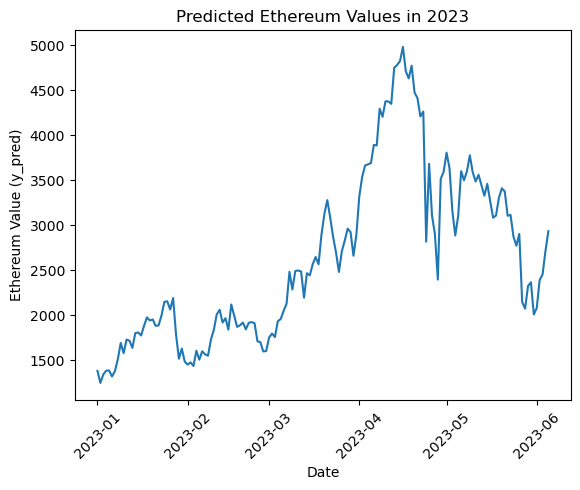

In [20]:
plt.plot(df_2023['date'], y_pred[:len(df_2023)])
plt.xlabel('Date')
plt.ylabel('Ethereum Value (y_pred)')
plt.title('Predicted Ethereum Values in 2023')
plt.xticks(rotation=45)
plt.show()

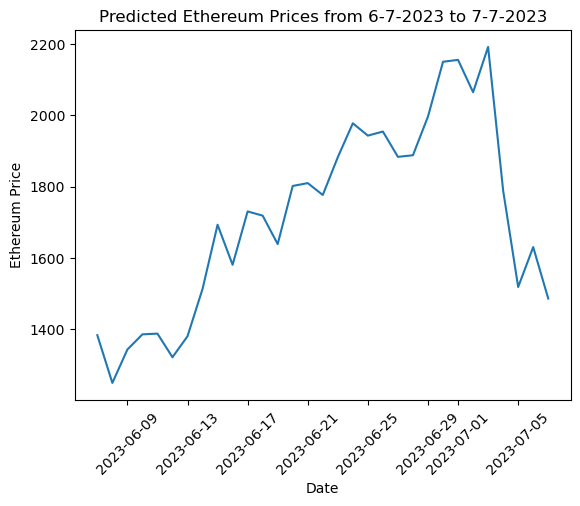

In [21]:
predicted_dates = pd.date_range(start='2023-06-07', end='2023-07-07')

plt.plot(predicted_dates, y_pred[:len(predicted_dates)])
plt.xlabel('Date')
plt.ylabel('Ethereum Price')
plt.title('Predicted Ethereum Prices from 6-7-2023 to 7-7-2023')
plt.xticks(rotation=45)
plt.show()